In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('styler.format.precision', 2)

In [10]:
titanic_train = pd.read_csv('data_titanic/train.csv')
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
categ = titanic_train.dtypes[titanic_train.dtypes == 'object'].index

titanic_train[categ].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
del titanic_train['PassengerId']
del titanic_train['Ticket']

titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [17]:
new_survived = pd.Categorical(titanic_train['Survived'])
new_survived = new_survived.rename_categories(['Died', 'Survived'])
titanic_train['Survived'] = new_survived

new_Pclass = pd.Categorical(titanic_train['Pclass'])
new_Pclass = new_Pclass.rename_categories(['1stClass', '2ndClass', '3rdClass'])
titanic_train['Pclass'] = new_Pclass

titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,Died,3rdClass,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,Survived,1stClass,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,Survived,3rdClass,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,Survived,1stClass,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,Died,3rdClass,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [18]:
titanic_train.dtypes

Survived    category
Pclass      category
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked      object
dtype: object

In [19]:
categ = titanic_train.dtypes[titanic_train.dtypes == 'category'].index
titanic_train[categ].describe()

,Survived,Pclass
count,891,891
unique,2,3
top,Died,3rdClass
freq,549,491


In [21]:
titanic_train['Cabin'].unique()
char_cabin = titanic_train['Cabin'].astype(str)
new_cabin = pd.Categorical([cabin[0] for cabin in char_cabin])
titanic_train['Cabin'] = new_cabin
titanic_train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,Died,3rdClass,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,Survived,1stClass,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,Survived,3rdClass,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,Survived,1stClass,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,Died,3rdClass,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S
5,Died,3rdClass,"Moran, Mr. James",male,NaN,0,0,8.4583,n,Q
6,Died,1stClass,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E,S
7,Died,3rdClass,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,n,S
8,Survived,3rdClass,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,n,S
9,Survived,2ndClass,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,n,C


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

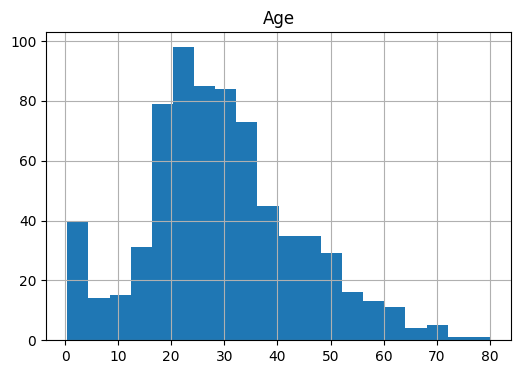

In [22]:
titanic_train.hist(column='Age', figsize=(6, 4), bins=20)

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

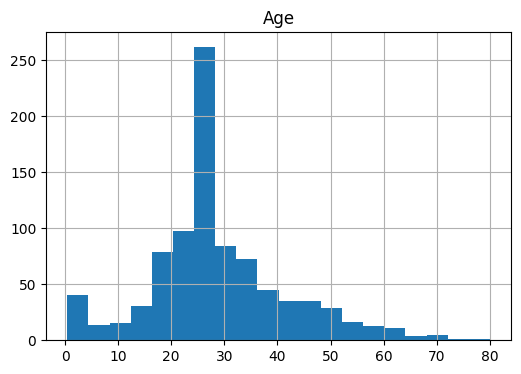

In [23]:
median = np.median([el for el in titanic_train['Age'] if not np.isnan(el)])
new_age = np.where(titanic_train['Age'].isnull(), median, titanic_train['Age'])
titanic_train['Age'] = new_age

titanic_train.hist(column='Age', figsize=(6, 4), bins=20)

In [24]:
titanic_train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

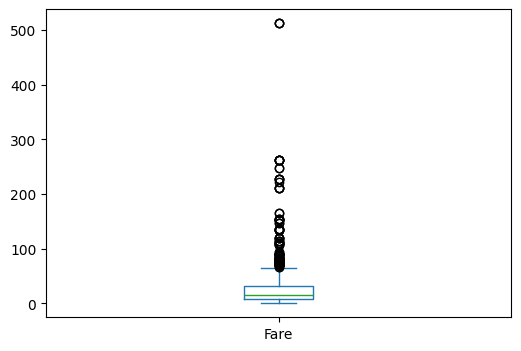

In [25]:
titanic_train['Fare'].plot(kind='box', figsize=(6, 4))

In [33]:
titanic_train.loc[titanic_train['Fare'].apply(lambda x: int(x)) == 512, :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,Survived,1stClass,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,Survived,1stClass,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,Survived,1stClass,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


In [35]:
titanic_train["Family"] = titanic_train['SibSp'] + titanic_train['Parch']
most_family = np.where(titanic_train['Family'] == max(titanic_train['Family']))
titanic_train.loc[most_family]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,Died,3rdClass,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,Died,3rdClass,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,Died,3rdClass,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,Died,3rdClass,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,Died,3rdClass,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,Died,3rdClass,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,Died,3rdClass,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10
